# Sales Analysis

#### Import necessary libraries

In [1]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Read in updated dataframe

In [2]:
all_data = pd.read_csv("F:\ITI BI\MeriSkill\Projects\Project 1 - Sales Data Analysis/Sales Data.csv")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


### Data Cleaning and Exploration

##### Looking For NAN

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
all_data['Product'].describe()

count                   185950
unique                      19
top       USB-C Charging Cable
freq                     21903
Name: Product, dtype: object

In [6]:
all_data['Order Date'].describe()

count                  185950
unique                 142395
top       2019-12-15 20:16:00
freq                        8
Name: Order Date, dtype: object

In [7]:
all_data['City'].describe()

count             185950
unique                 9
top        San Francisco
freq               44732
Name: City, dtype: object

## Data Exploration By Questions 

#### Question 1: What was the best month for sales? How much was earned that month? 

In [8]:
sorted_data = all_data.groupby(['Month']).sum().sort_values(by='Sales', ascending=False)
sorted_data

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Sales,Hour
Month,,,,,,
12,313688708,7685904705,28114,4588415.41,4613443.34,359978
10,206528743,5457110383,22703,3715554.83,3736726.88,290650
4,167977608,3387347100,20558,3367671.02,3390670.24,262259
11,155210546,5047202573,19798,3180600.68,3199603.20,254865
5,137829259,3345871523,18667,3135125.13,3152606.75,238780
3,115333587,2564810956,17005,2791207.83,2807100.38,218969
7,102752005,3284139576,16072,2632539.56,2647775.76,206169
6,92330356,2932976072,15253,2562025.61,2577802.26,195528
8,71824951,2899373917,13448,2230345.42,2244467.88,172289


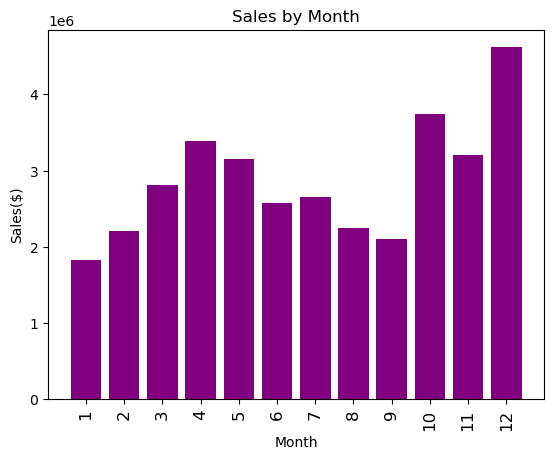

In [9]:
import matplotlib.pyplot as plt

sales = sorted_data['Sales'].sort_values(ascending = False)


plt.bar(sorted_data.index, sales, color = 'purple')

plt.xticks(sorted_data.index, rotation='vertical', size=8)
plt.ylabel('Sales($)')
plt.xlabel('Month')
plt.xticks(fontsize=12)
plt.title('Sales by Month')
plt.show()

#### Question 2: What city sold the most product?

In [10]:
sorted_data = all_data.groupby(['City']).sum().sort_values(by='Sales', ascending=False)
sorted_data

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,,,
San Francisco,372569180,10304443952,50239,8211461.74,315520,8262203.91,643265
Los Angeles,247743297,6811084693,33289,5421435.23,208325,5452570.80,427444
New York City,208439450,5736333884,27932,4635370.83,175741,4664317.43,357696
Boston,165758780,4598265261,22528,3637409.77,141112,3661642.01,288225
Atlanta,122928154,3423838407,16602,2779908.20,104794,2795498.58,214264
Dallas,124308328,3415643578,16730,2752627.82,104620,2767975.40,214390
Seattle,122394893,3406693974,16553,2733296.01,104941,2747755.48,213292
Portland,104043698,2868861092,14053,2307747.47,87765,2320490.61,179632
Austin,82709457,2280982185,11153,1809873.61,69829,1819581.75,141946


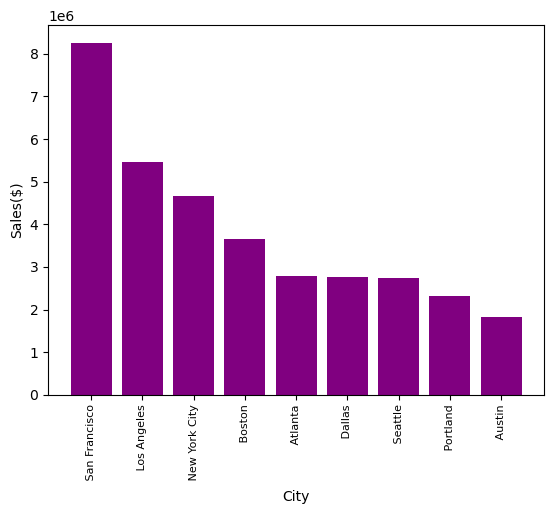

In [11]:
import matplotlib.pyplot as plt

sales = sorted_data['Sales']

plt.bar(sorted_data.index, sales , color = 'purple')

plt.xticks(sorted_data.index)
plt.ylabel('Sales($)')
plt.xlabel('City')
plt.xticks(sorted_data.index, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

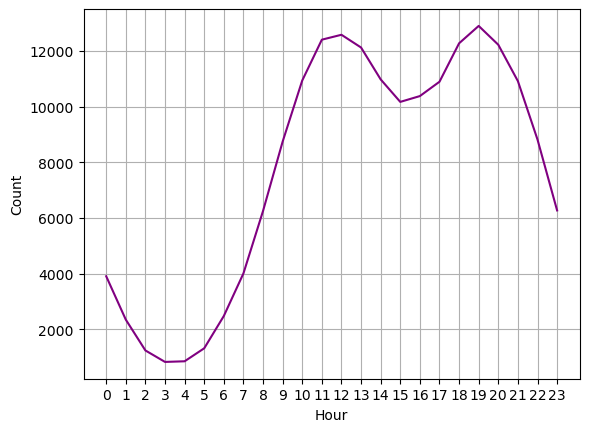

In [12]:
import matplotlib.pyplot as plt
hour_counts = all_data['Hour'].value_counts().sort_index()

keys = hour_counts.index

plt.plot(keys, hour_counts, color = 'purple')
plt.xticks(keys)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### What product sold the most? Why do you think it sold the most?

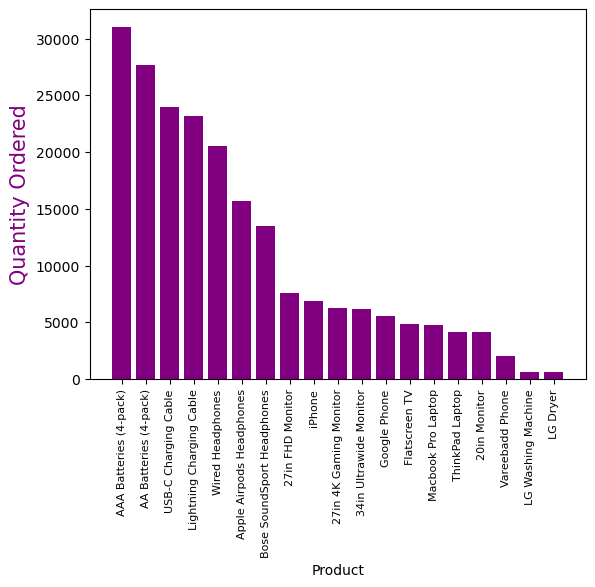

In [14]:
product_group = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

plt.bar(product_group.index, product_group , color = 'purple')
plt.xticks(product_group.index, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered' , color = 'purple' , size =15)
plt.show()

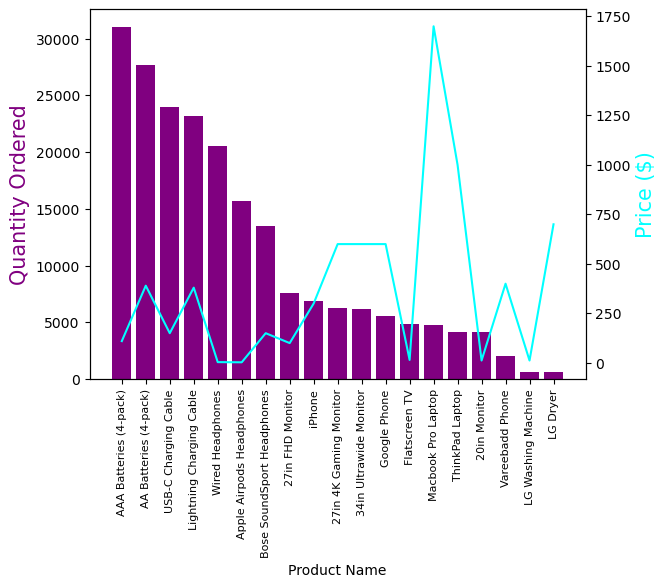

In [15]:
# Group by 'Product' and calculate mean price and sum of quantity ordered
product_data = all_data.groupby('Product').agg({'Price Each': 'mean', 'Quantity Ordered': 'sum'})

# Unpack the calculated data
prices = product_data['Price Each']
quantity_ordered = product_data['Quantity Ordered']
keys = product_data.index

# Sort the quantity ordered column in descending order
quantity_ordered = quantity_ordered.sort_values(ascending=False)

# Create a new list of keys that corresponds to the sorted quantity ordered column
sorted_keys = [key for key, quantity in quantity_ordered.iteritems()]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sorted_keys, quantity_ordered, color='purple')
ax2.plot(sorted_keys, prices, color='cyan')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='purple', size = 15)
ax2.set_ylabel('Price ($)', color='cyan' , size = 15)
ax1.set_xticklabels(sorted_keys, rotation='vertical', size=8)

plt.show()